<a href="https://colab.research.google.com/github/skaty5678/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction : Predicting ten years risk of coronary heart disease.</u></b>

## <b> Problem Description </b>


###The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset provides the patients’ information. It includesover 4,000 records and 15 attributes.

##**Variables**

###Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


##**Data Description**

##***Demographic***

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated towhole numbers, the concept of age is continuous)

##***Behavioral***

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##***Medical( history)***

• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

##***Medical(current)***

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)

##***Predict variable (desired target)***

• **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.drop(columns=['education','id'],inplace = True)

In [7]:
df.shape

(3390, 15)

In [8]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [10]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [11]:
missing_values(df)

,missing values,percent of missing values
glucose,304,9.0
BPMeds,44,1.3
totChol,38,1.1
cigsPerDay,22,0.6
BMI,14,0.4
heartRate,1,0.0
age,0,0.0
sex,0,0.0
is_smoking,0,0.0
prevalentStroke,0,0.0


In [12]:
df.dropna(axis=0, inplace=True)


In [13]:
#checking for numeric features
numeric_features = df.describe().columns
numeric_features

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [14]:
#checking for categorical features
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

In [15]:
df['TenYearCHD'].value_counts()

0    2547
1     457
Name: TenYearCHD, dtype: int64

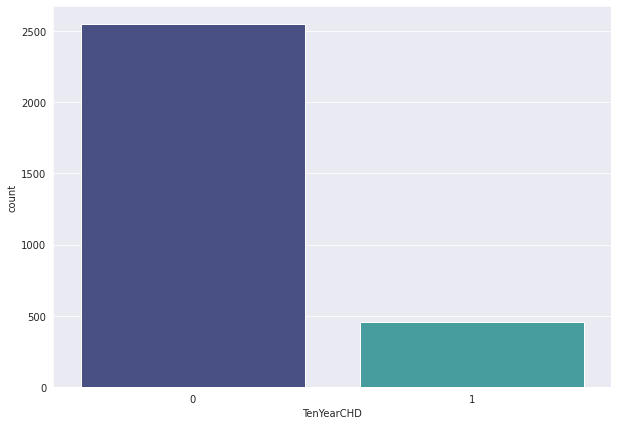

In [16]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='TenYearCHD',data=df,palette='mako')
plt.show()

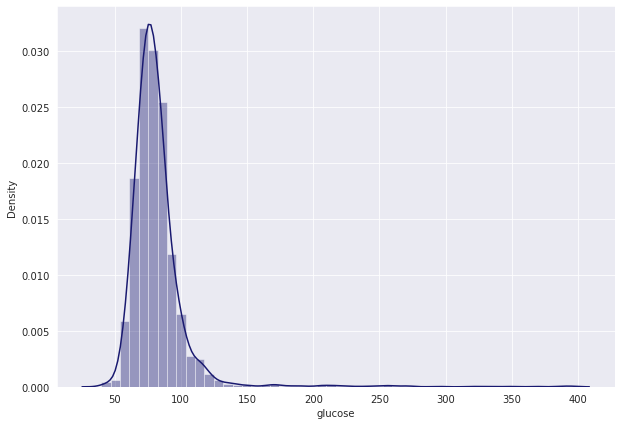

In [17]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['glucose'],color="midnightblue")
plt.show()

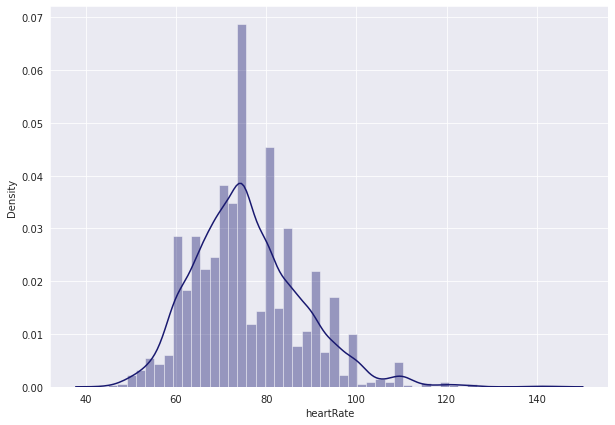

In [18]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['heartRate'],color="midnightblue")
plt.show()

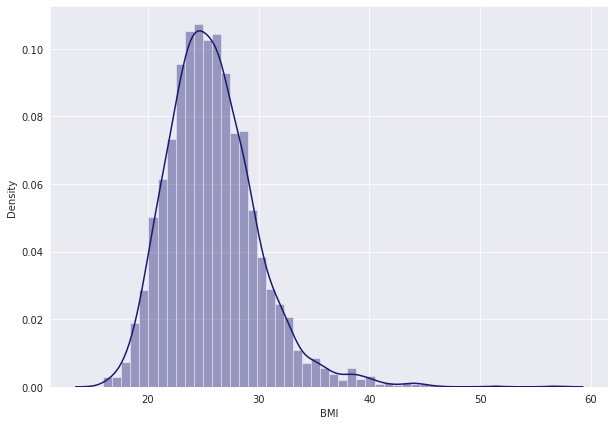

In [19]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['BMI'],color="midnightblue")
plt.show()

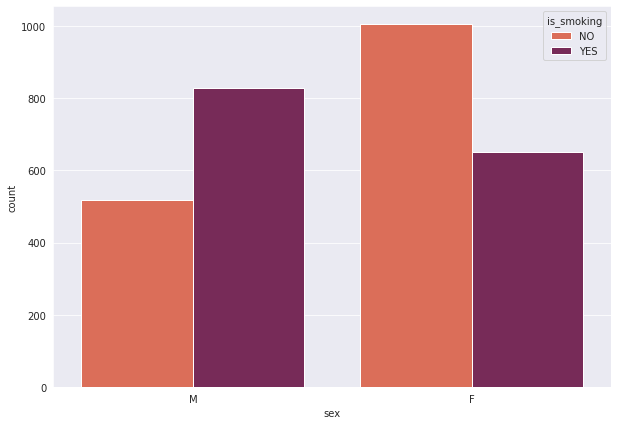

In [20]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='is_smoking',palette='rocket_r')
plt.show()

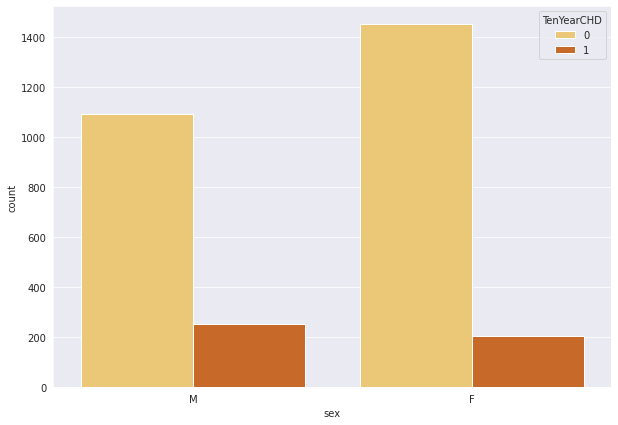

In [21]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='TenYearCHD',palette='YlOrBr')
plt.show()

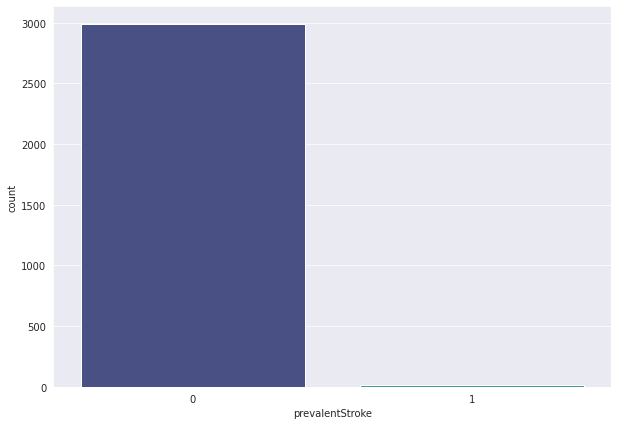

In [22]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='prevalentStroke',data=df,palette='mako')
plt.show()

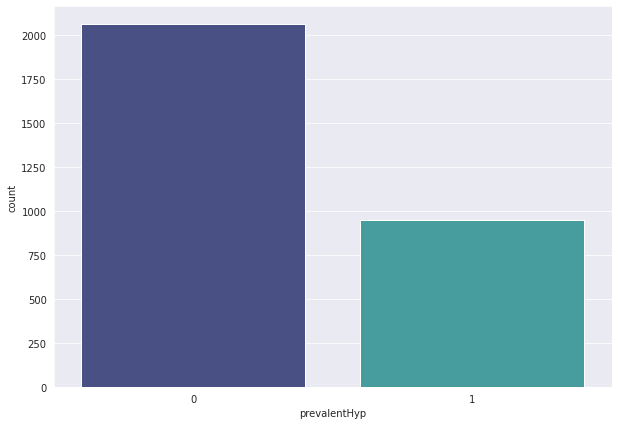

In [23]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='prevalentHyp',data=df,palette='mako')
plt.show()

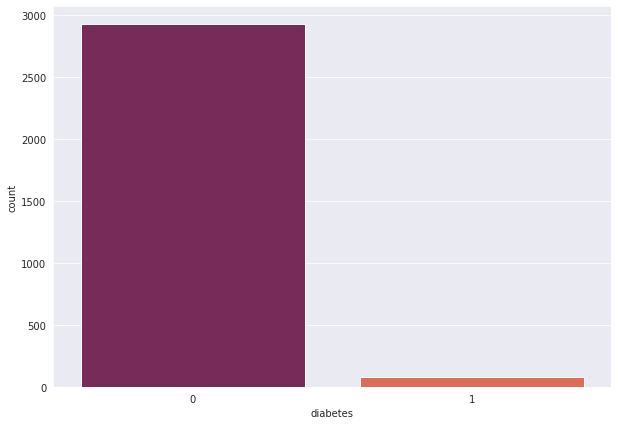

In [24]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='diabetes',data=df,palette='rocket')
plt.show()

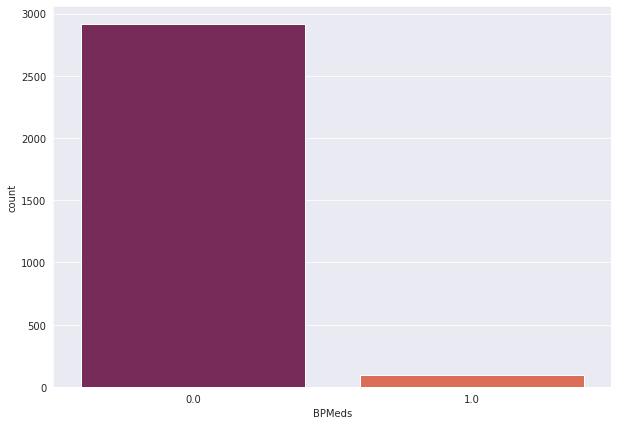

In [25]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='BPMeds',data=df,palette='rocket')
plt.show()

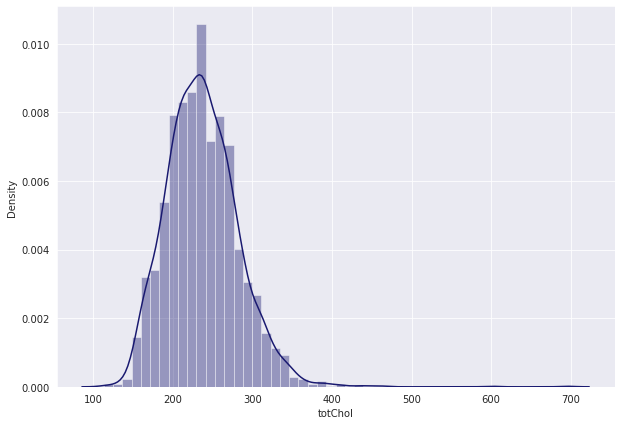

In [26]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['totChol'],color="midnightblue")
plt.show()

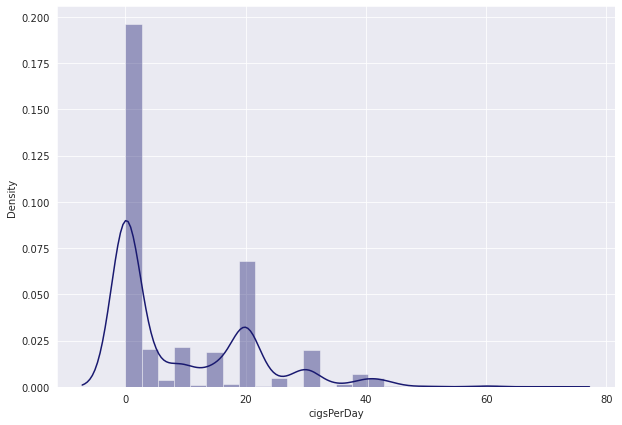

In [27]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['cigsPerDay'],color="midnightblue")
plt.show()

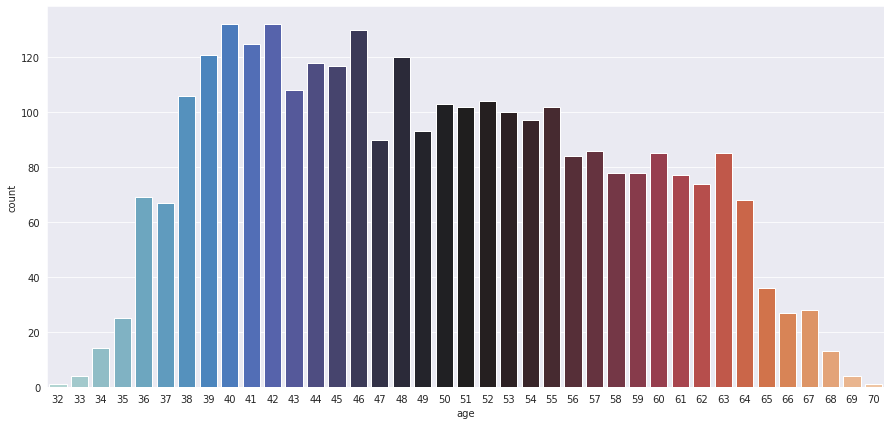

In [28]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
sns.countplot(df['age'],palette="icefire")
plt.show()

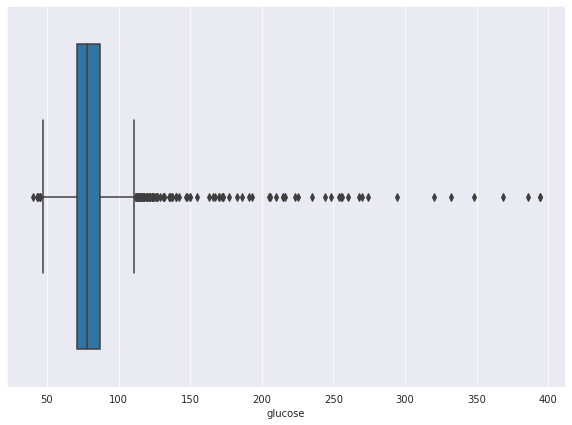

In [29]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['glucose'], orient='horizontal')
plt.show()

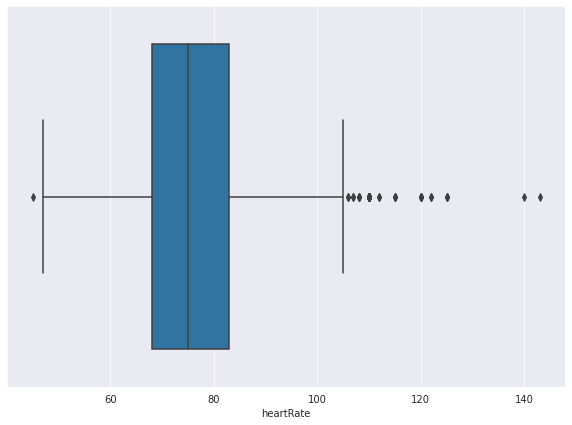

In [30]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['heartRate'], orient='horizontal')
plt.show()

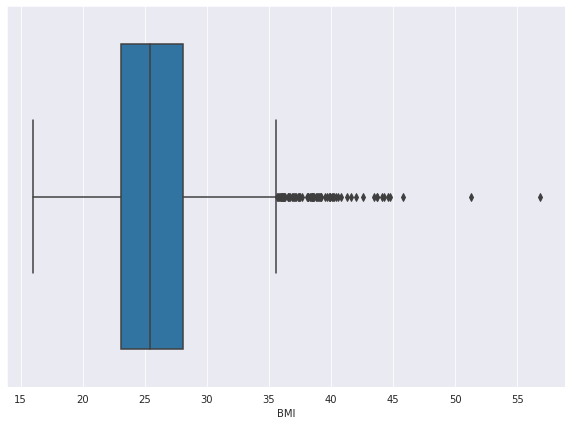

In [31]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['BMI'], orient='horizontal')
plt.show()

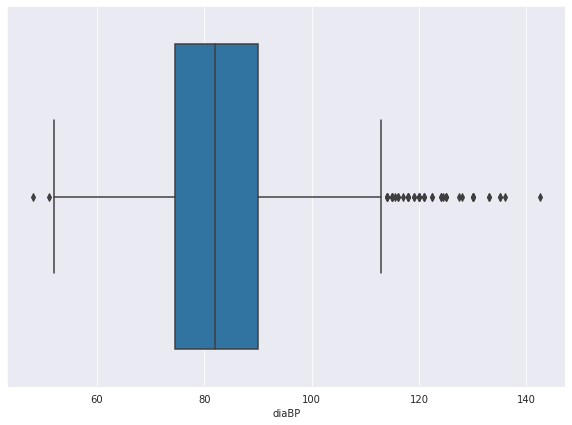

In [32]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['diaBP'], orient='horizontal')
plt.show()

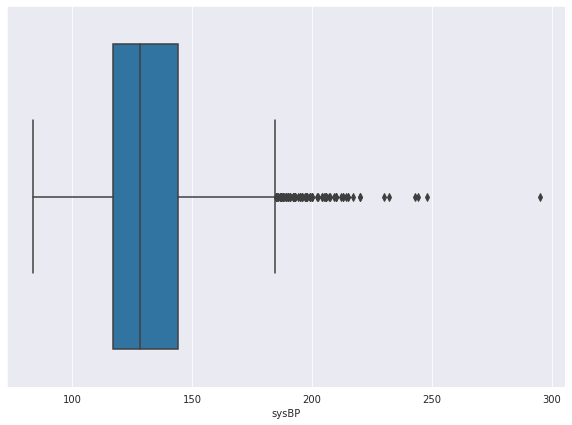

In [33]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['sysBP'], orient='horizontal')
plt.show()

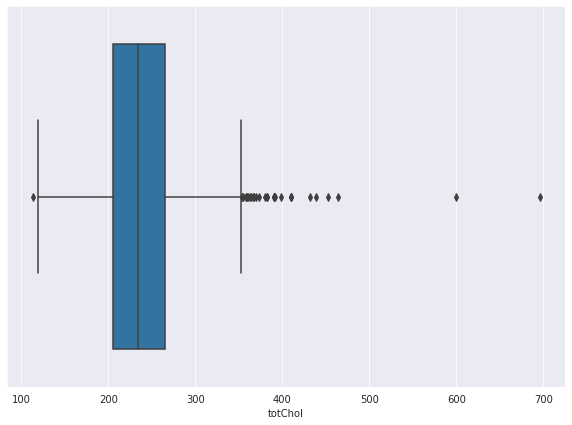

In [34]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['totChol'], orient='horizontal')
plt.show()

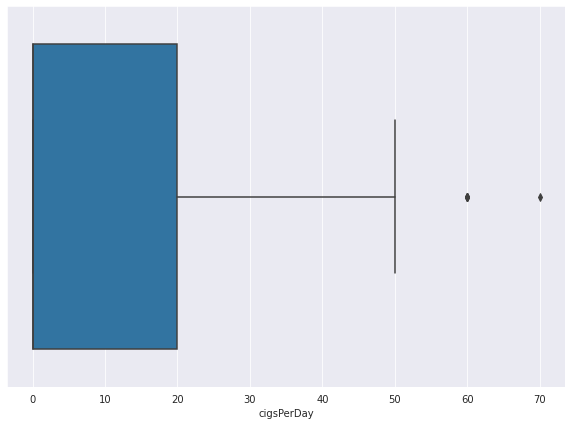

In [35]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['cigsPerDay'], orient='horizontal')
plt.show()

In [36]:
df = pd.get_dummies(df,columns=['sex','is_smoking'])

In [37]:
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1
5,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0,1,0


In [38]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES'],
      dtype='object')

In [40]:
df.shape

(3004, 17)